### Abdul Rahman

### 1. 	Programming Question

Write a function to find the longest common prefix string amongst an array of strings.
If there is no common prefix, return an empty string "".

In [1]:
# m = length of the longest common prefix
# n  = total number of words in array
# Time Complexity = O(m*n)
def longestCommonPrefix(words):
  if words is None or len(words) == 0:
    return ""

  for i, c in enumerate(words[0]):
    for j in range(1, len(words)):
      if i == len(words[j]) or c != words[j][i]:
        return words[0][:i]

  return words[0]

print('Common Prefix: "', longestCommonPrefix(["flower","flow","flight"]),'"')
print('Common Prefix: "', longestCommonPrefix(["dog","racecar","car"]),'"')

Common Prefix: " fl "
Common Prefix: "  "


### 2.	Short-term Load Forecasting

In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

from google.colab import drive, files

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.models import load_model
from matplotlib import pyplot

np.random.seed(3)

Using TensorFlow backend.


In [0]:
def import_data(filename):
  
  drive.mount('/content/gdrive')
  mainDir = "/content/gdrive/My Drive/SP Group/"
  df = pd.read_csv(mainDir + filename)
  return df


def get_train_data(df):
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  return X, y

def normalize(data):
  return (data-data.min())/(data.max()-data.min())


def feature_engineering(data):
    
  overralLoad = data.iloc[:, 6:18]
  airLoad = data.iloc[:, 18:31]

  data['loadMean'] = overralLoad.mean(axis=1)
  data['airLoadMean'] = airLoad.mean(axis=1)
  data['loadVar'] = overralLoad.var(axis=1)
  data['airLoadVar'] = airLoad.var(axis=1)
  data['loadMad'] = overralLoad.skew(axis=1)
  data['airLoadMad'] = airLoad.skew(axis=1)
  data['loadSkew'] = overralLoad.kurtosis(axis=1)
  data['airLoadKurtosis'] = airLoad.kurtosis(axis=1)

  merged_data = pd.concat([overralLoad, airLoad, data.iloc[:, 32:]], axis=1, join='inner')

  normalized_data = normalize(merged_data)
  normalized_data['isWeekend'] = data.iloc[:, 3] > 4
  normalized_data['isHoliday'] = data.iloc[:, 30]

  return normalized_data
  
  
def ml_model(X, y, b_size=64, total_epochs=100, validation=0.2, dropout_level=0.3, activation_function='relu', loss_function='mae', gradient_function='adam'):
  
  model = Sequential()
  model.add(LSTM(34, input_shape=(X.shape[1], X.shape[2])))
  model.add(BatchNormalization())
  model.add(Activation(activation_function))
  model.add(Dropout(dropout_level))
  model.add(Dense(1))
  
  model.compile(loss=loss_function, optimizer=gradient_function)
  fit = model.fit(X, y, epochs=total_epochs, batch_size=b_size, validation_split=validation)
  return fit, model

def plot_graph(fit, title):
  print(title)
  pyplot.plot(fit.history['loss'], label='train')
  pyplot.plot(fit.history['val_loss'], label='validation')
  pyplot.legend()
  pyplot.show()

In [4]:
data = import_data('train.csv')
X, y = get_train_data(data)
X = feature_engineering(X)
print(list(X))
print(X.head())

X = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))
print(X.shape)
print(y.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['OverallLoad1', 'OverallLoad2', 'OverallLoad3', 'OverallLoad4', 'OverallLoad5', 'OverallLoad6', 'OverallLoad7', 'OverallLoad8', 'OverallLoad9', 'OverallLoad10', 'OverallLoad11', 'OverallLoad12', 'AirLoad1', 'AirLoad2', 'AirLoad3', 'AirLoad4', 'AirLoad5', 'AirLoad6', 'AirLoad7', 'AirLoad8', 'AirLoad9', 'AirLoad10', 'AirLoad11', 'AirLoad12', 'isHollidays', 'airLoadMean', 'loadVar', 'airLoadVar', 'loadMad', 'airLoadMad', 'loadSkew', 'airLoadKurtosis', 'isWeekend', 'isHoliday']
   OverallLoad1  OverallLoad2  OverallLoad3  OverallLoad4  OverallLoad5  \
0      0.034268      0.033333      0.034810      0.032258      0.033426   
1      0.267913      0.470000      0.601266      0.403226      0.437326   
2      0.034268      0.040000      0.034810      0.032258      0.027855   
3      0.040498      0.036667      0.034810      0.032258      0.030641   
4      0.00000

In [5]:
fit, model = ml_model(X, y)

Train on 3372 samples, validate on 844 samples
Epoch 1/100
3372/3372 [==============================] - 1s 355us/step - loss: 0.3189 - val_loss: 0.1423
Epoch 2/100
3372/3372 [==============================] - 0s 57us/step - loss: 0.2072 - val_loss: 0.1239
Epoch 3/100
3372/3372 [==============================] - 0s 61us/step - loss: 0.1710 - val_loss: 0.1142
Epoch 4/100
3372/3372 [==============================] - 0s 58us/step - loss: 0.1430 - val_loss: 0.0995
Epoch 5/100
3372/3372 [==============================] - 0s 57us/step - loss: 0.1208 - val_loss: 0.0918
Epoch 6/100
3372/3372 [==============================] - 0s 61us/step - loss: 0.1105 - val_loss: 0.0918
Epoch 7/100
3372/3372 [==============================] - 0s 61us/step - loss: 0.0990 - val_loss: 0.0885
Epoch 8/100
3372/3372 [==============================] - 0s 58us/step - loss: 0.0958 - val_loss: 0.0817
Epoch 9/100
3372/3372 [==============================] - 0s 59us/step - loss: 0.0906 - val_loss: 0.0765
Epoch 10/100
337

Training loss Vs Validation loss


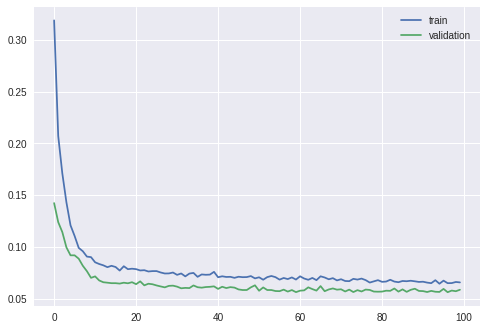

In [6]:
plot_graph(fit, 'Training loss Vs Validation loss')

In [7]:
fit, model = ml_model(X, y, validation=0.0)


Epoch 1/100
4216/4216 [==============================] - 1s 344us/step - loss: 0.3106
Epoch 2/100
4216/4216 [==============================] - 0s 62us/step - loss: 0.2023
Epoch 3/100
4216/4216 [==============================] - 0s 61us/step - loss: 0.1440
Epoch 4/100
4216/4216 [==============================] - 0s 62us/step - loss: 0.1185
Epoch 5/100
4216/4216 [==============================] - 0s 58us/step - loss: 0.1011
Epoch 6/100
4216/4216 [==============================] - 0s 56us/step - loss: 0.0931
Epoch 7/100
4216/4216 [==============================] - 0s 59us/step - loss: 0.0894
Epoch 8/100
4216/4216 [==============================] - 0s 58us/step - loss: 0.0870
Epoch 9/100
4216/4216 [==============================] - 0s 57us/step - loss: 0.0835
Epoch 10/100
4216/4216 [==============================] - 0s 56us/step - loss: 0.0793
Epoch 11/100
4216/4216 [==============================] - 0s 55us/step - loss: 0.0791
Epoch 12/100
4216/4216 [==============================] - 0s 5

In [8]:
result = model.evaluate(X, y)
print('MAE Training loss', result)

4216/4216 [==============================] - 0s 88us/step
MAE Training loss 0.056555916776127785


In [9]:
data = import_data('test.csv')
X_test = feature_engineering(data)
print(X_test.head())
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape)
prediction = model.predict(X_test)

sample_solution = import_data('sampleSolution.csv')
sample_solution['p'] = prediction
sample_solution.to_csv("solution.csv", index=False)
files.download("solution.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   OverallLoad1  OverallLoad2  OverallLoad3  OverallLoad4  OverallLoad5  \
0      0.028754      0.028409      0.029316      0.038732      0.034247   
1      0.028754      0.025568      0.032573      0.035211      0.034247   
2      0.031949      0.025568      0.032573      0.035211      0.030822   
3      0.137380      0.119318      0.136808      0.151408      0.140411   
4      0.178914      0.153409      0.175896      0.158451      0.147260   

   OverallLoad6  OverallLoad7  OverallLoad8  OverallLoad9  OverallLoad10  \
0      0.028037      0.025568      0.031646      0.032258       0.033557   
1      0.028037      0.025568      0.031646      0.035484       0.030201   
2      0.031153      0.025568      0.028481      0.038710       0.030201   
3      0.149533      0.090909      0.069620      0.109677       0.174497   
4      0.133956      0.116477      0.1